### Importing libaries and Understanding the Data

In [241]:
# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns', None)


In [242]:
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [243]:
data.shape

(9240, 37)

In [244]:
data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [245]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Checking and Finding Missing values

In [246]:
per=round((data.isnull().sum()/len(data)).sort_values(ascending=False),2)
print(per)

Lead Quality                                     0.52
Asymmetrique Activity Index                      0.46
Asymmetrique Profile Score                       0.46
Asymmetrique Activity Score                      0.46
Asymmetrique Profile Index                       0.46
Tags                                             0.36
Lead Profile                                     0.29
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
How did you hear about X Education               0.24
Specialization                                   0.16
City                                             0.15
Page Views Per Visit                             0.01
TotalVisits                                      0.01
Last Activity                                    0.01
Lead Source                                      0.00
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

## Data Cleaning and handling missing values

Many of the categorical variable have 'Select' as value, which need to be handled

In [247]:
data.replace('Select', np.nan,inplace=True)

In [248]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Counts of categary in all the columns

In [249]:
for col in data:
    print(data[col].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [250]:
# Encoding the variables with yes/no labels
for f in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    data[f] = data[f].apply(lambda x : 1 if x=='Yes' else 0)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


Below columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [251]:
data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [252]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [253]:
# As the Lead Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"

data['Lead Quality'].replace(np.nan, 'Not Sure',inplace=True)

In [254]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


Drop Columns with more than 40% Null Values

In [255]:
data.drop(data.loc[:,list(round(data.isnull().sum()/data.shape[0], 2)>0.40)].columns, 1,inplace=True)

In [256]:
round((data.isnull().sum()/len(data)).sort_values(ascending=False),2)

City                                             0.40
Specialization                                   0.37
Tags                                             0.36
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
TotalVisits                                      0.01
Page Views Per Visit                             0.01
Last Activity                                    0.01
Lead Source                                      0.00
Lead Quality                                     0.00
Update me on Supply Chain Content                0.00
Lead Origin                                      0.00
Through Recommendations                          0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Receive More Updates About Our Courses           0.00
Magazine                    

In [257]:
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [258]:
data['Country'].mode()

0    India
Name: Country, dtype: object

 More than 95% data is of "India" and hence it is safer to impute NULLS with this value

In [259]:
data['Country'].replace(np.nan,'India',inplace=True)

In [260]:
round((data.isnull().sum()/len(data)).sort_values(ascending=False),2)

City                                             0.40
Specialization                                   0.37
Tags                                             0.36
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
TotalVisits                                      0.01
Page Views Per Visit                             0.01
Last Activity                                    0.01
Lead Source                                      0.00
Lead Origin                                      0.00
Receive More Updates About Our Courses           0.00
Lead Quality                                     0.00
Update me on Supply Chain Content                0.00
Digital Advertisement                            0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Through Recommendations                          0.00
Magazine                    

The column 'Country', has a very high number of features which makes it inconvenient to create dummy variables. Hence,dropping the country

In [261]:
data.drop('Country',1,inplace=True)

In [262]:
data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [263]:
data['City'].mode()

0    Mumbai
Name: City, dtype: object

City has 40 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

In [264]:
data.drop('City',1,inplace=True)

Tags has 36.29 % missing values.This is current status, this column will not be useful for modeling

In [265]:
data.drop('Tags',1,inplace=True)

In [266]:
round((data.isnull().sum()/len(data)).sort_values(ascending=False),3)

Specialization                                   0.366
What matters most to you in choosing a course    0.293
What is your current occupation                  0.291
TotalVisits                                      0.015
Page Views Per Visit                             0.015
Last Activity                                    0.011
Lead Source                                      0.004
Lead Origin                                      0.000
Digital Advertisement                            0.000
A free copy of Mastering The Interview           0.000
I agree to pay the amount through cheque         0.000
Get updates on DM Content                        0.000
Update me on Supply Chain Content                0.000
Lead Quality                                     0.000
Receive More Updates About Our Courses           0.000
Through Recommendations                          0.000
Magazine                                         0.000
Newspaper                                        0.000
X Educatio

In [267]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

What matters most to you in choosing a course has the level Better Career Prospects 6528 times while rest is one or two. So we should drop this column as well.

In [268]:
data.drop('What matters most to you in choosing a course',1,inplace=True)

In [269]:
data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

The specialization is evenly distributed. Hencedropping is not a good choice. We need to create additional category called 'Others'

In [270]:
data['Specialization'].replace(np.nan, 'Others',inplace=True)

In [271]:
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value

In [272]:
data['What is your current occupation'].replace(np.nan, 'Unemployed',inplace=True)

In [273]:
data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Imputing Google to null values as it has highest numer of occurence

In [274]:
data['Lead Source'].replace(np.nan, 'Google',inplace=True)

In [275]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [276]:
## Imputing Email Opened to null values as it has highest numer of occurence
data['Last Activity'].replace(np.nan, 'Email Opened',inplace=True)

In [277]:
data.drop('Lead Quality',1,inplace=True)

In [278]:
round((data.isnull().sum()/len(data)).sort_values(ascending=False),2)

TotalVisits                                 0.01
Page Views Per Visit                        0.01
Lead Origin                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Magazine                                    0.00
Lead Source                                 0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

#### Numericsl column

In [279]:
data['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

Missing value in 'TotalVisits' is replaced by mode

In [280]:
data['TotalVisits'].fillna(data['TotalVisits'].mode()[0], inplace = True)

In [281]:
data['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

Missing value in 'Page Views Per Visit' is replaced by mode

In [282]:
data["Page Views Per Visit"].fillna(data["Page Views Per Visit"].mode()[0], inplace = True)

In [283]:
round((data.isnull().sum()/len(data)).sort_values(ascending=False),2)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

Dropping columns with only one unique value

In [284]:
cat_var = (['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque'])

In [285]:
for i in cat_var:
    print(i)
    print(data[i].value_counts(dropna=False))
    print("-----------------------------------------------------------")

Magazine
0    9240
Name: Magazine, dtype: int64
-----------------------------------------------------------
Receive More Updates About Our Courses
0    9240
Name: Receive More Updates About Our Courses, dtype: int64
-----------------------------------------------------------
Update me on Supply Chain Content
0    9240
Name: Update me on Supply Chain Content, dtype: int64
-----------------------------------------------------------
Get updates on DM Content
0    9240
Name: Get updates on DM Content, dtype: int64
-----------------------------------------------------------
I agree to pay the amount through cheque
0    9240
Name: I agree to pay the amount through cheque, dtype: int64
-----------------------------------------------------------


In [286]:
data.drop(cat_var,1, inplace=True)

In [287]:
data ['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [288]:
data.drop('Last Notable Activity',1,inplace=True)

Checking & Dropping Category Columns that are Skewed

<Axes: xlabel='Do Not Email', ylabel='count'>

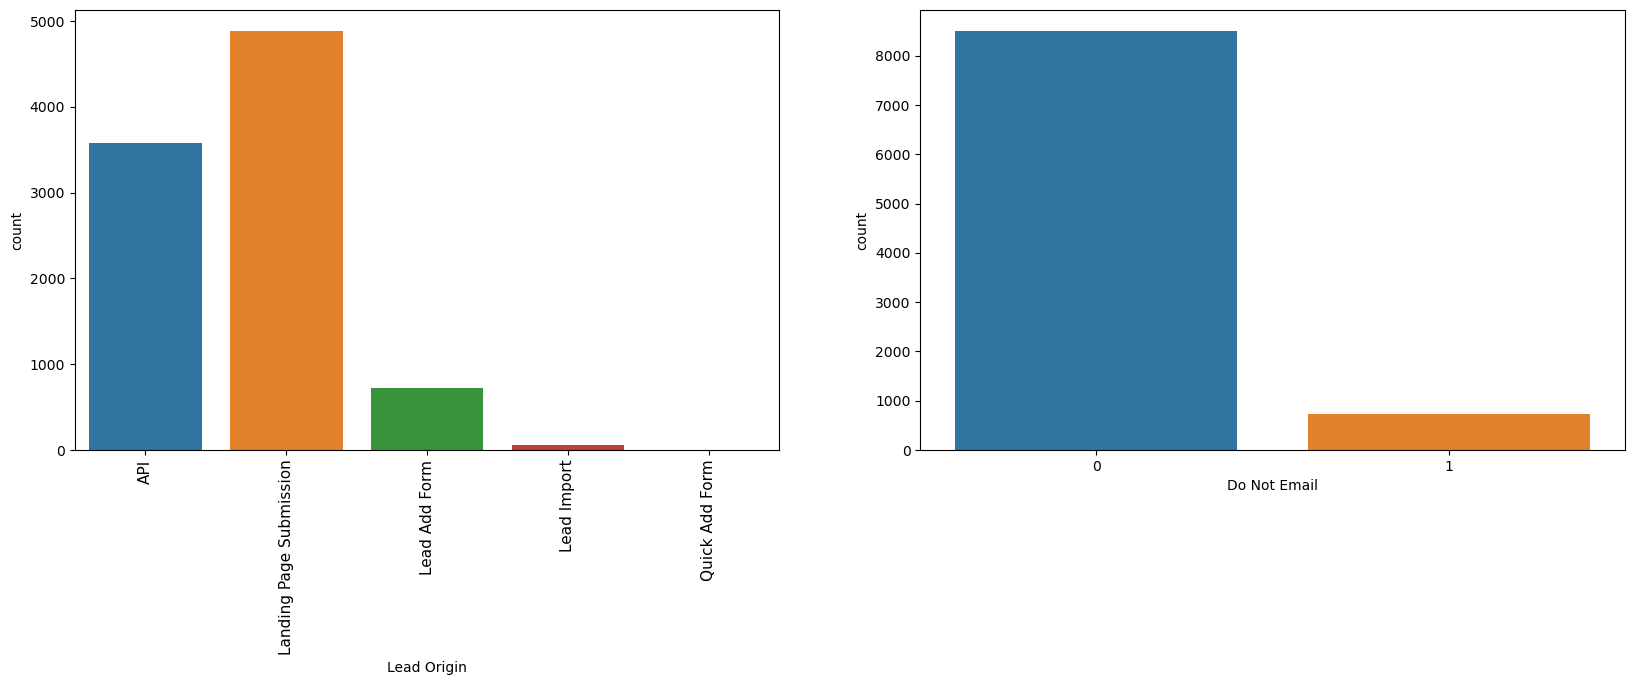

In [290]:
plt.figure(figsize=(20,40))   

plt.subplot(6,2,1)
sns.countplot(x = 'Lead Origin',data=data)
plt.xticks(rotation=90, fontsize=11)


plt.subplot(6,2,2)
sns.countplot(x = 'Do Not Email',data=data)



<Axes: xlabel='Do Not Call', ylabel='count'>

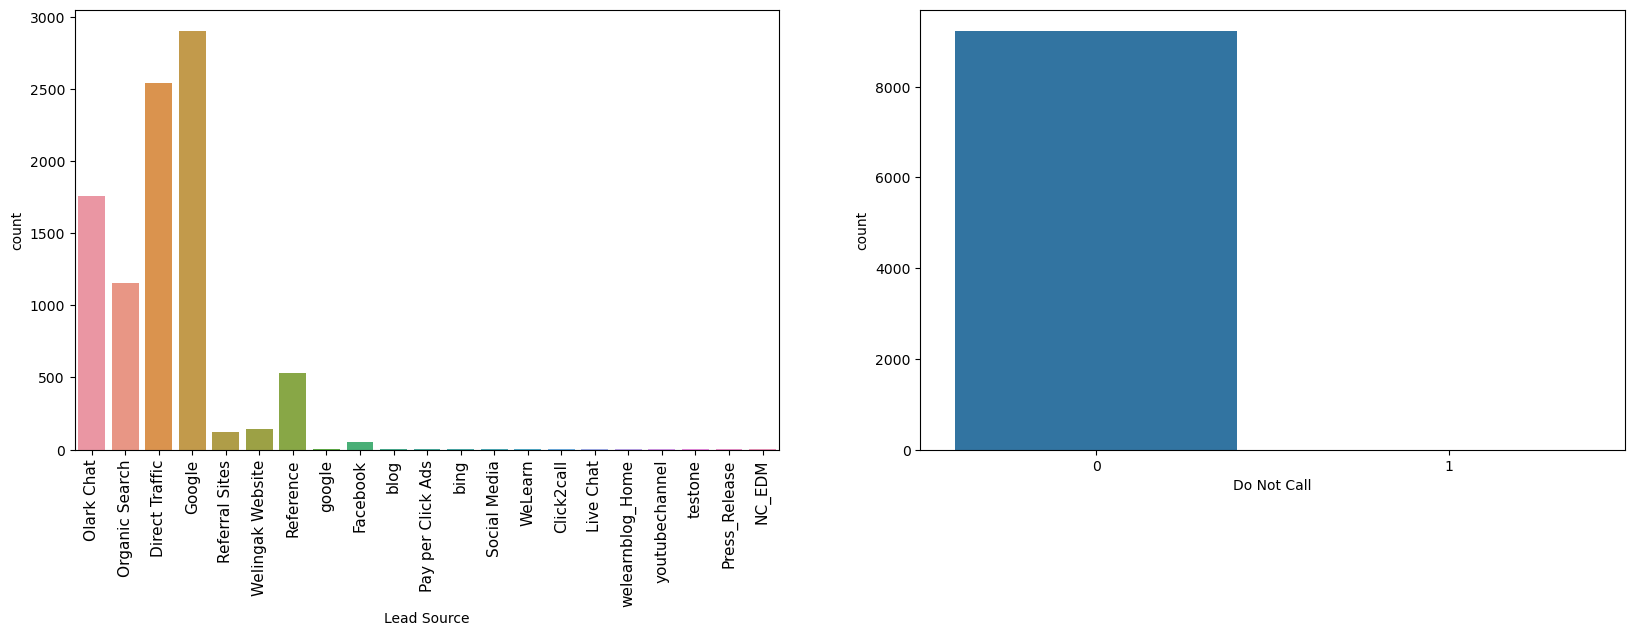

In [291]:
plt.figure(figsize=(20,40))   


plt.subplot(6,2,1)
sns.countplot(x = 'Lead Source',data=data)
plt.xticks(rotation=90, fontsize=11)


plt.subplot(6,2,2)
sns.countplot(x = 'Do Not Call',data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

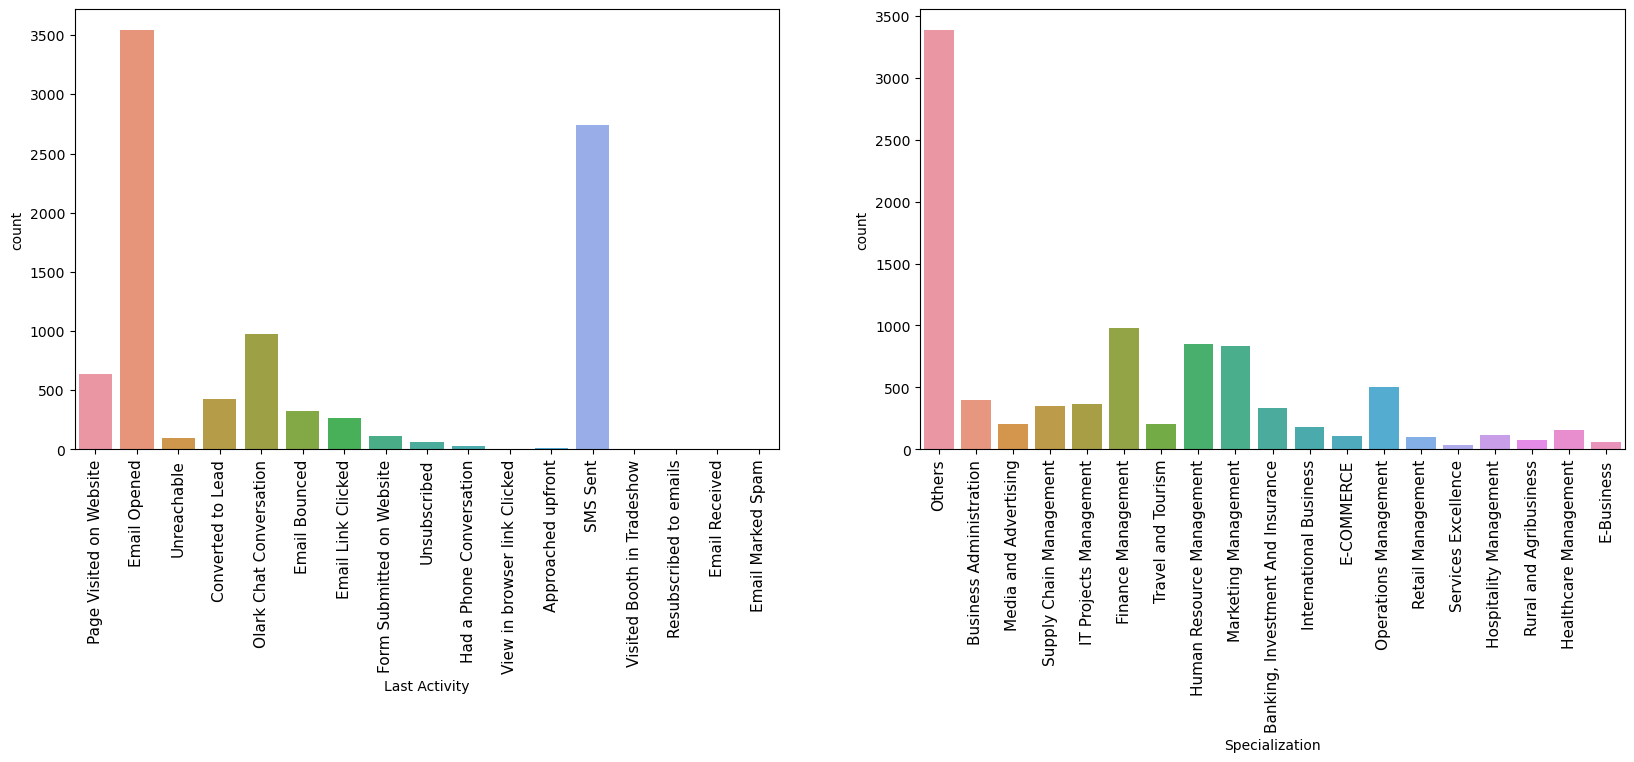

In [292]:
plt.figure(figsize=(20,40))   


plt.subplot(6,2,1)
sns.countplot(x = 'Last Activity',data=data)
plt.xticks(rotation=90, fontsize=11)


plt.subplot(6,2,2)
sns.countplot(x = 'Specialization',data=data)
plt.xticks(rotation=90, fontsize=11)


<Axes: xlabel='Search', ylabel='count'>

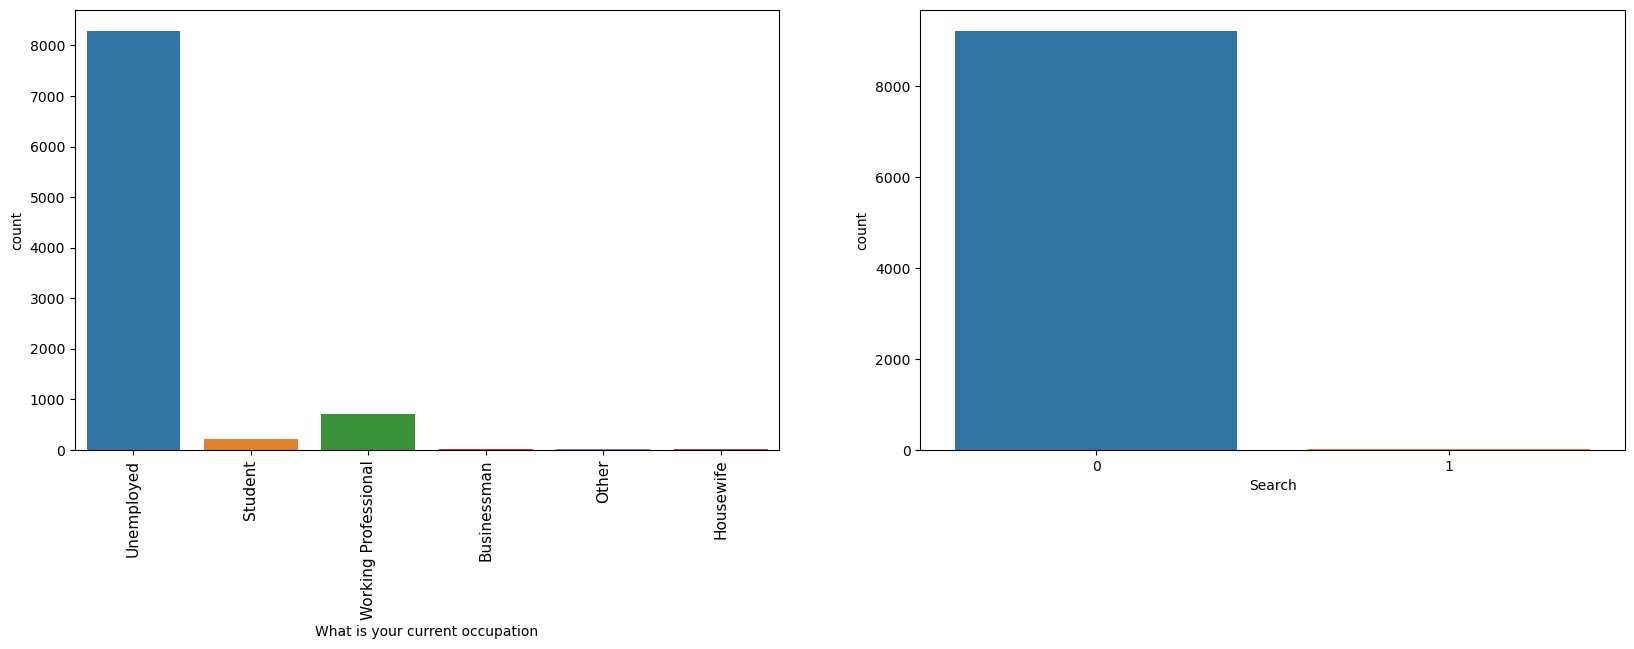

In [293]:
plt.figure(figsize=(20,40))   


plt.subplot(6,2,1)
sns.countplot(x = 'What is your current occupation',data=data)
plt.xticks(rotation=90, fontsize=11)


plt.subplot(6,2,2)
sns.countplot(x = 'Search',data=data)

<Axes: xlabel='A free copy of Mastering The Interview', ylabel='count'>

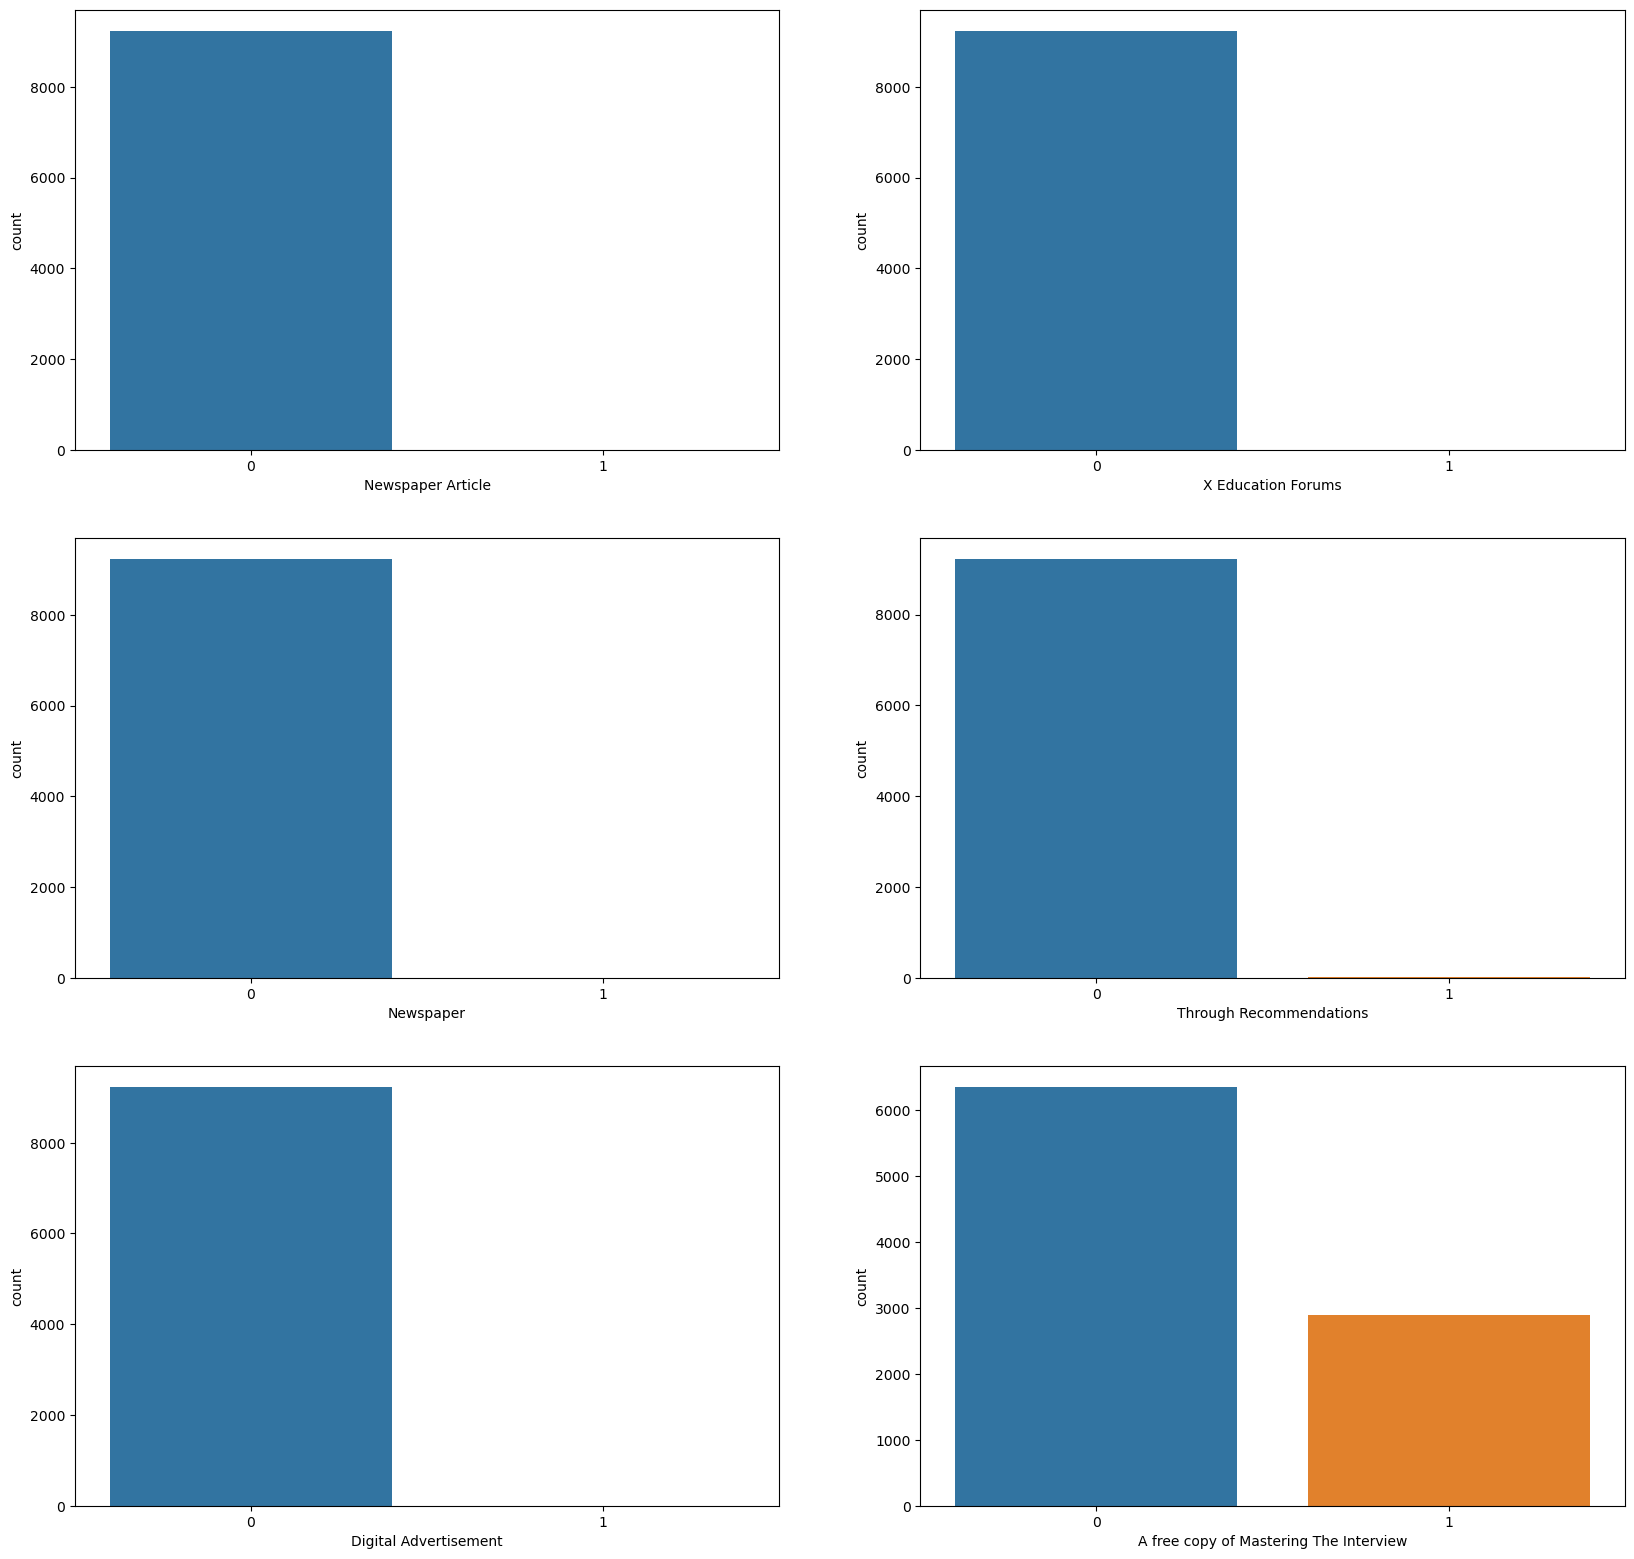

In [294]:
plt.figure(figsize=(20,40))   


plt.subplot(6,2,1)
sns.countplot(x = 'Newspaper Article',data=data)


plt.subplot(6,2,2)
sns.countplot(x = 'X Education Forums',data=data)

plt.subplot(6,2,3)
sns.countplot(x = 'Newspaper',data=data)

plt.subplot(6,2,4)
sns.countplot(x = 'Through Recommendations',data=data)

plt.subplot(6,2,5)
sns.countplot(x = 'Digital Advertisement',data=data)

plt.subplot(6,2,6)
sns.countplot(x = 'A free copy of Mastering The Interview',data=data)

In [295]:
# Dropping categorical columns with highly skewed data

data.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [296]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


### Outlier Analysis

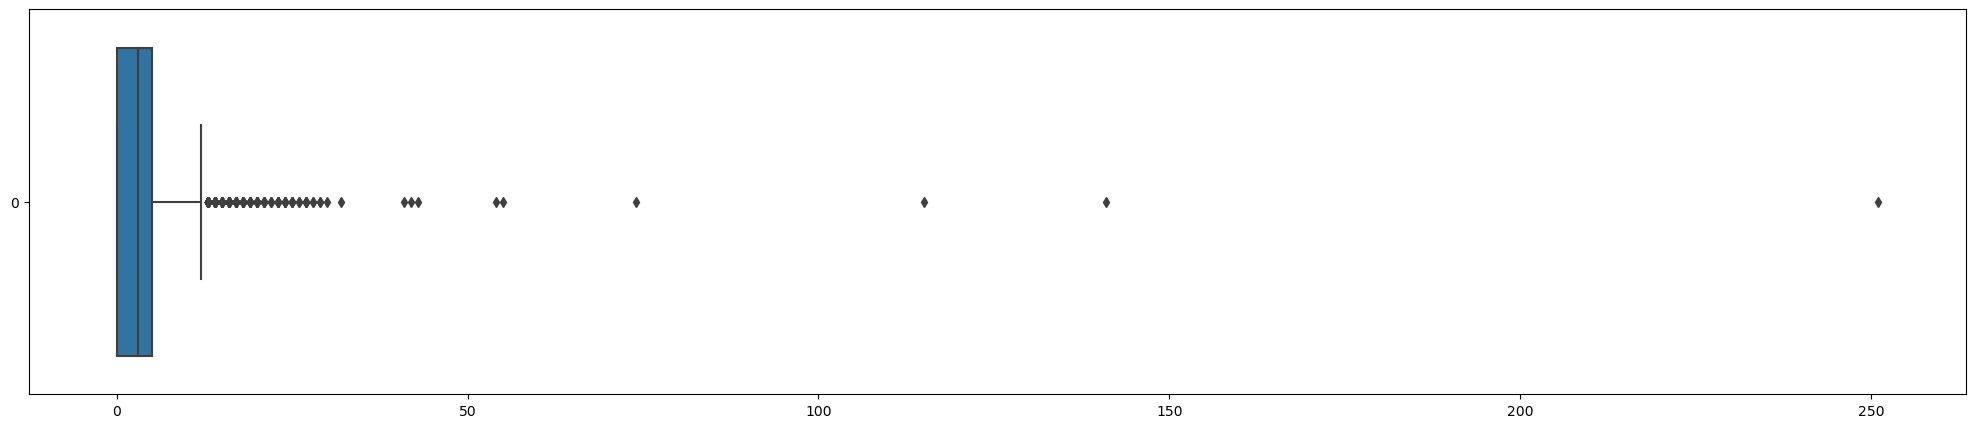

In [297]:
plt.figure(figsize=(25,5))
sns.boxplot(data['TotalVisits'],orient='h')
plt.show()

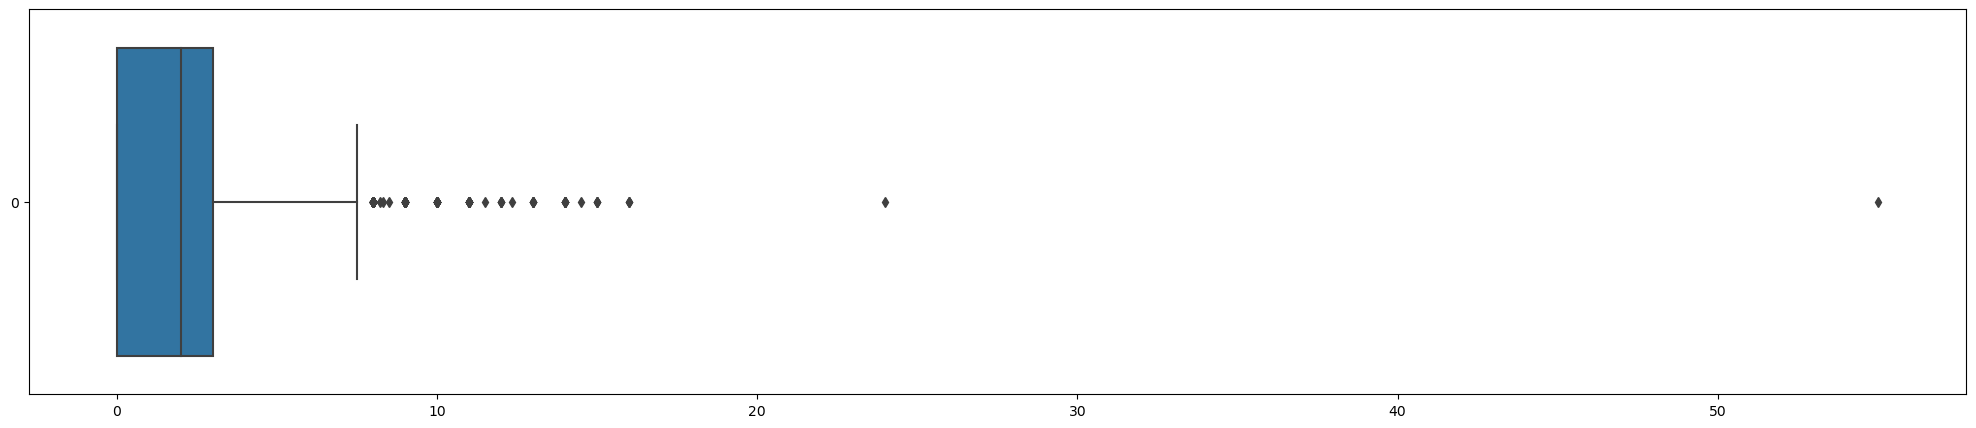

In [298]:
plt.figure(figsize=(25,5))
sns.boxplot(data['Page Views Per Visit'],orient='h')
plt.show()

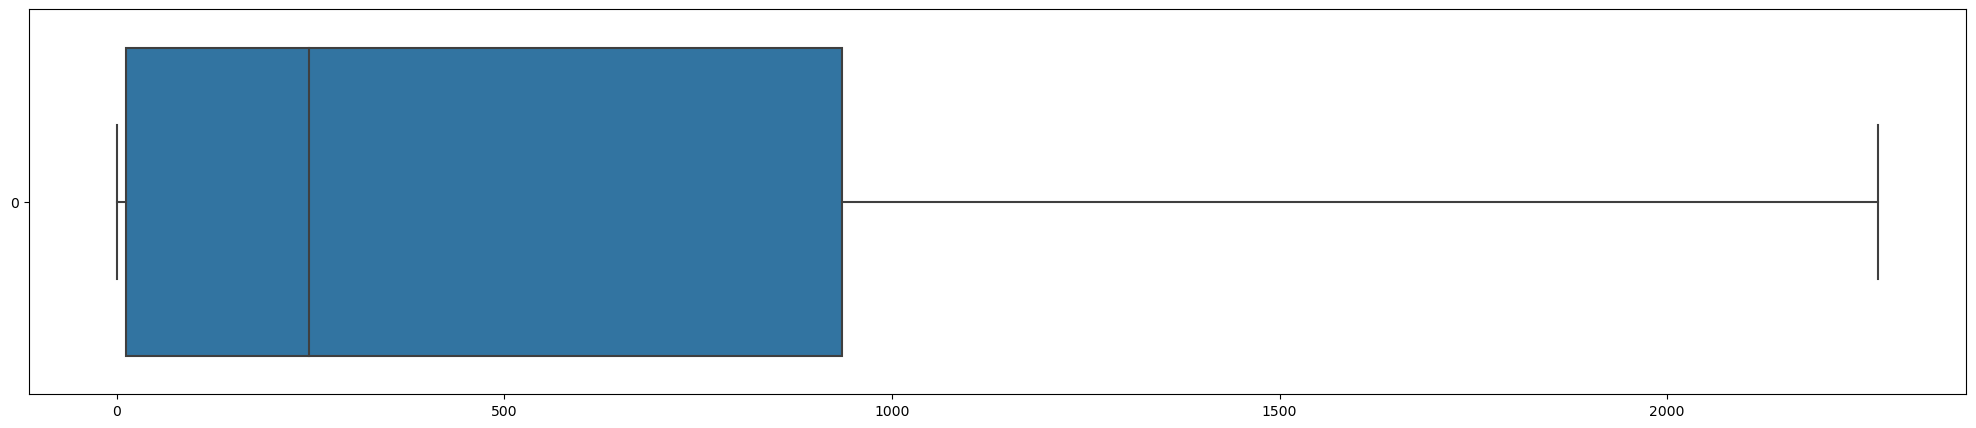

In [299]:
plt.figure(figsize=(25,5))
sns.boxplot(data['Total Time Spent on Website'],orient='h')
plt.show()

"TotalVisits","Page Views Per Visit"contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables

Defining UDF to treat outliers via capping and flooring

In [300]:
def Outlier_treatment(d,columnList):
    for i in columnList:
        q1 = d[i].describe()["25%"]
        q3 = d[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        d[i] = np.where(d[i] > upper_bound, upper_bound,d[i])

        # flooring lower_bound
        d[i] = np.where(d[i] < lower_bound, lower_bound,d[i])

In [301]:
cap_col = ["TotalVisits","Page Views Per Visit"]

Outlier_treatment(data,cap_col)

Outliers after treatment

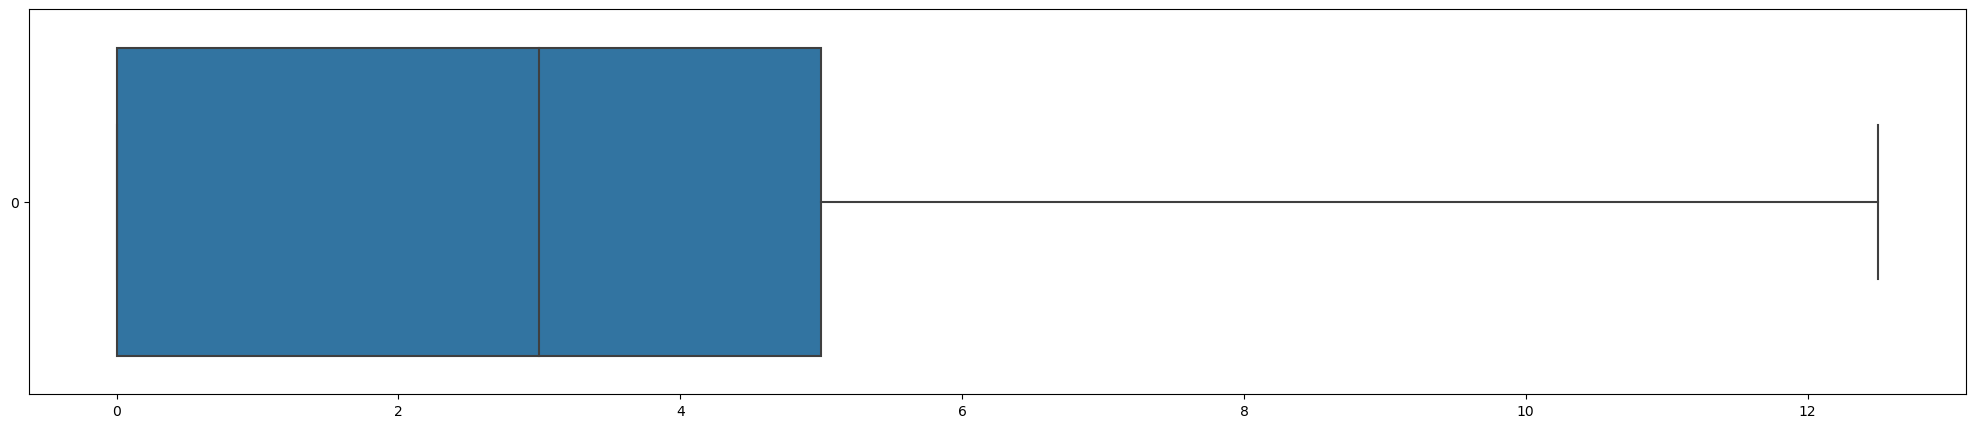

In [302]:
plt.figure(figsize=(25,5))
sns.boxplot(data['TotalVisits'],orient='h')
plt.show()

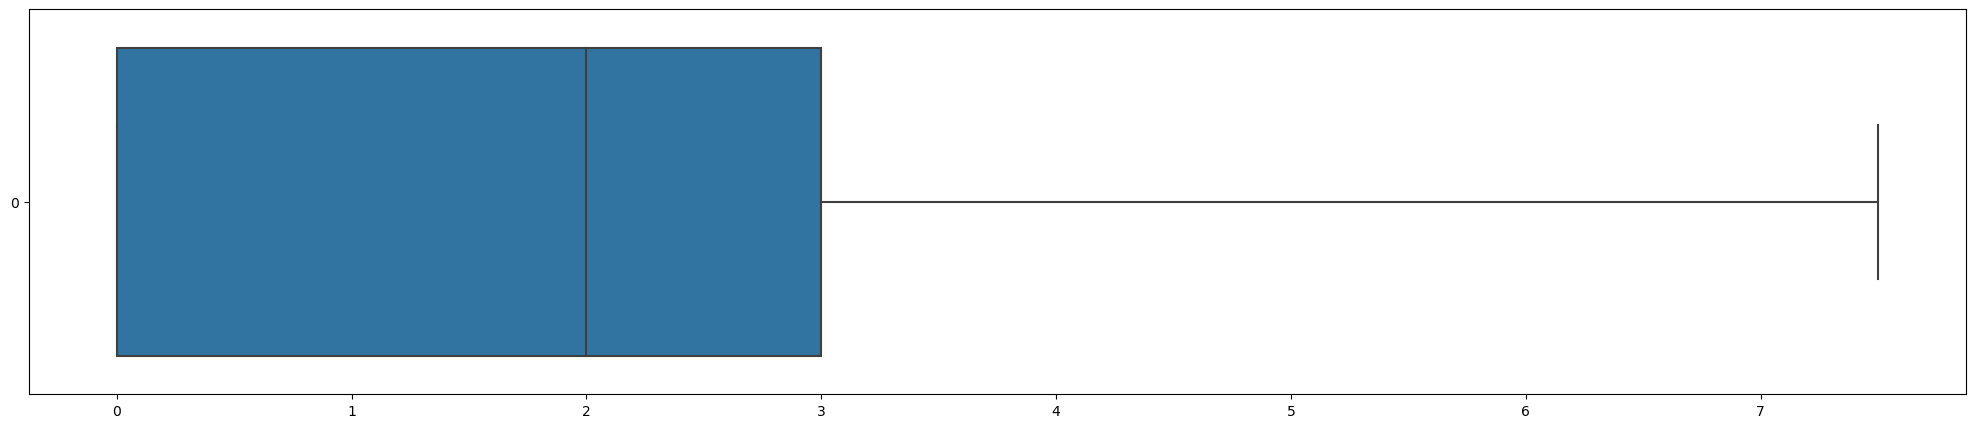

In [303]:
plt.figure(figsize=(25,5))
sns.boxplot(data['Page Views Per Visit'],orient='h')
plt.show()

Grouping Low frequency values

In [304]:
data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront','View in browser link Clicked',
                               'Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'],'Others',inplace=True)

In [305]:
data['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [306]:
data['Lead Source'].replace("google","Google",inplace=True)

In [307]:
data['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others",inplace=True)

In [308]:
data["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

## EDA

'Converted' is our target variable. <br>
Data imbalance is in the context of Target variable only.<br>
'1' means converted and '0' means not converted.

In [309]:
data['Converted'].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

Conversion rate is of 38.5%

<Axes: xlabel='Converted', ylabel='count'>

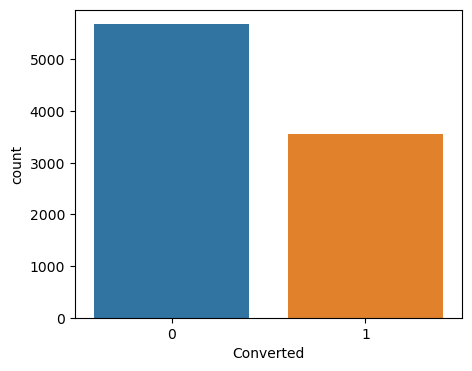

In [310]:
plt.figure(figsize=(5,4))   
sns.countplot(x = 'Converted',data=data)

#### Univariate Analysis on Categorical Variables

In [311]:
cat_var = ["Lead Origin","What is your current occupation","Do Not Email",
            "A free copy of Mastering The Interview","Lead Source","Last Activity","Specialization"]

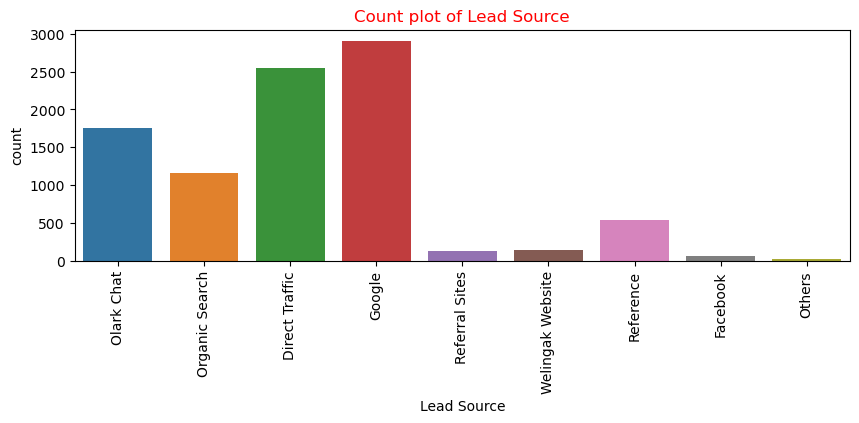

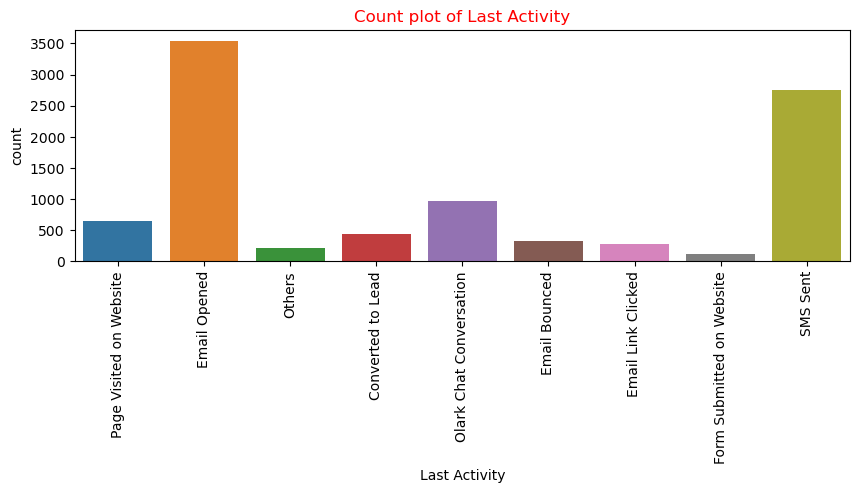

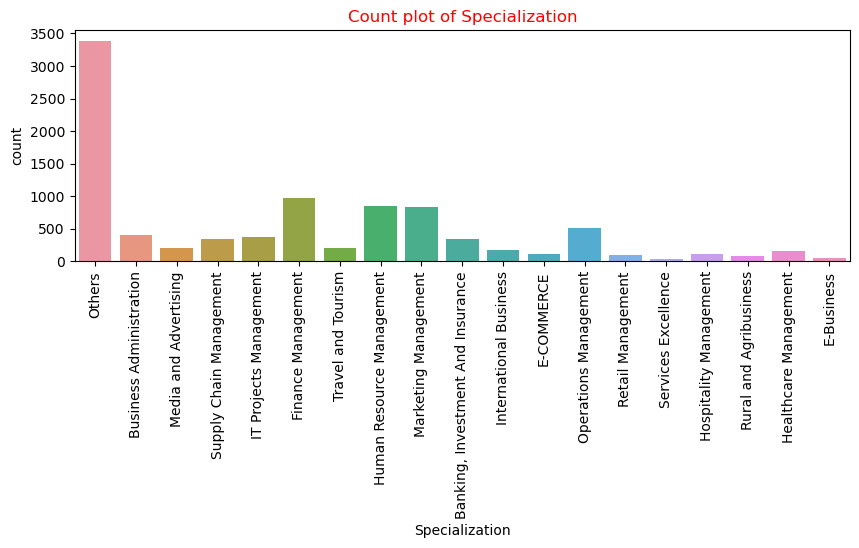

In [312]:
for i in cat_var[4:]:
    
    plt.figure(figsize=[10,3])
    plt.title("Count plot of {}".format(i),color="red")
    sns.countplot(x=i,data=data)
    total=len(data[i])
    plt.xticks(rotation=90)
    
plt.show()

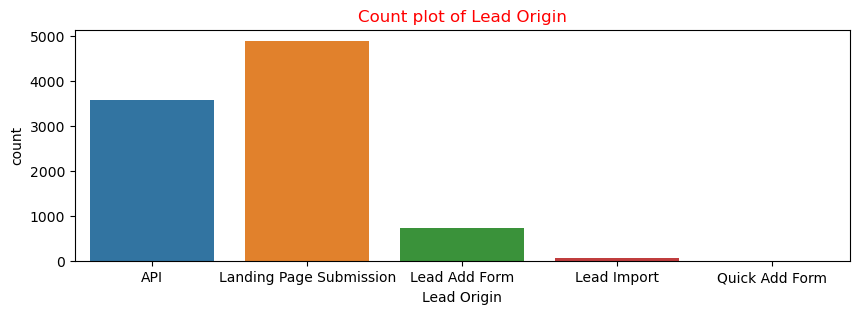

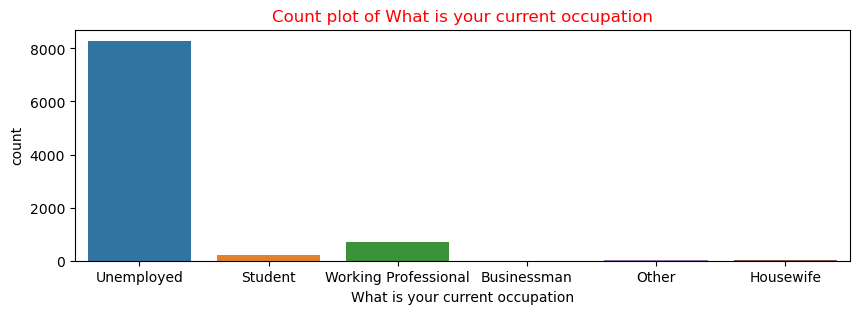

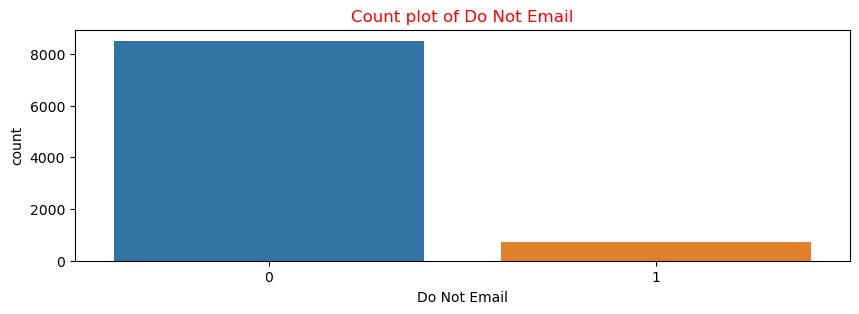

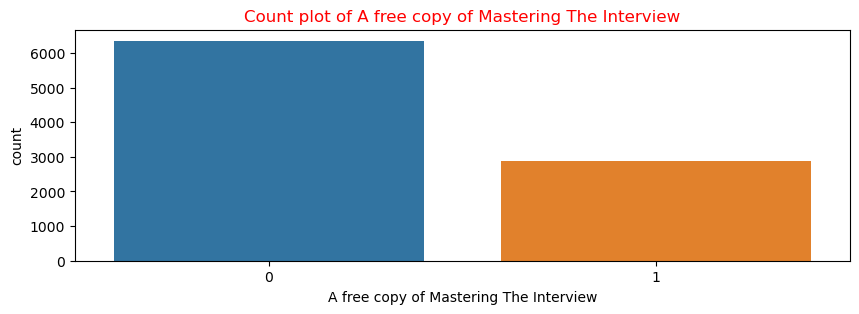

In [313]:
for i in cat_var[:4]:
    
    plt.figure(figsize=[10,3])
    plt.title("Count plot of {}".format(i),color="red")
    sns.countplot(x=i,data=data)
    total=len(data[i])
    plt.xticks(rotation=0)
    
plt.show()

In [ ]:
Lead Origin: "Landing Page Submission" identified most customers.

Current_occupation: 90% of the customers as Unemployed

Do Not Email:More than 90% of the people has opted that they dont want to be emailed about the course.

Lead Source: 60% Lead source is from Google 

Last Activity: 70% of customers contribution in SMS Sent & Email Opened activities

#### Bivariate Analysis for Categorical Variables

<Axes: xlabel='A free copy of Mastering The Interview', ylabel='count'>

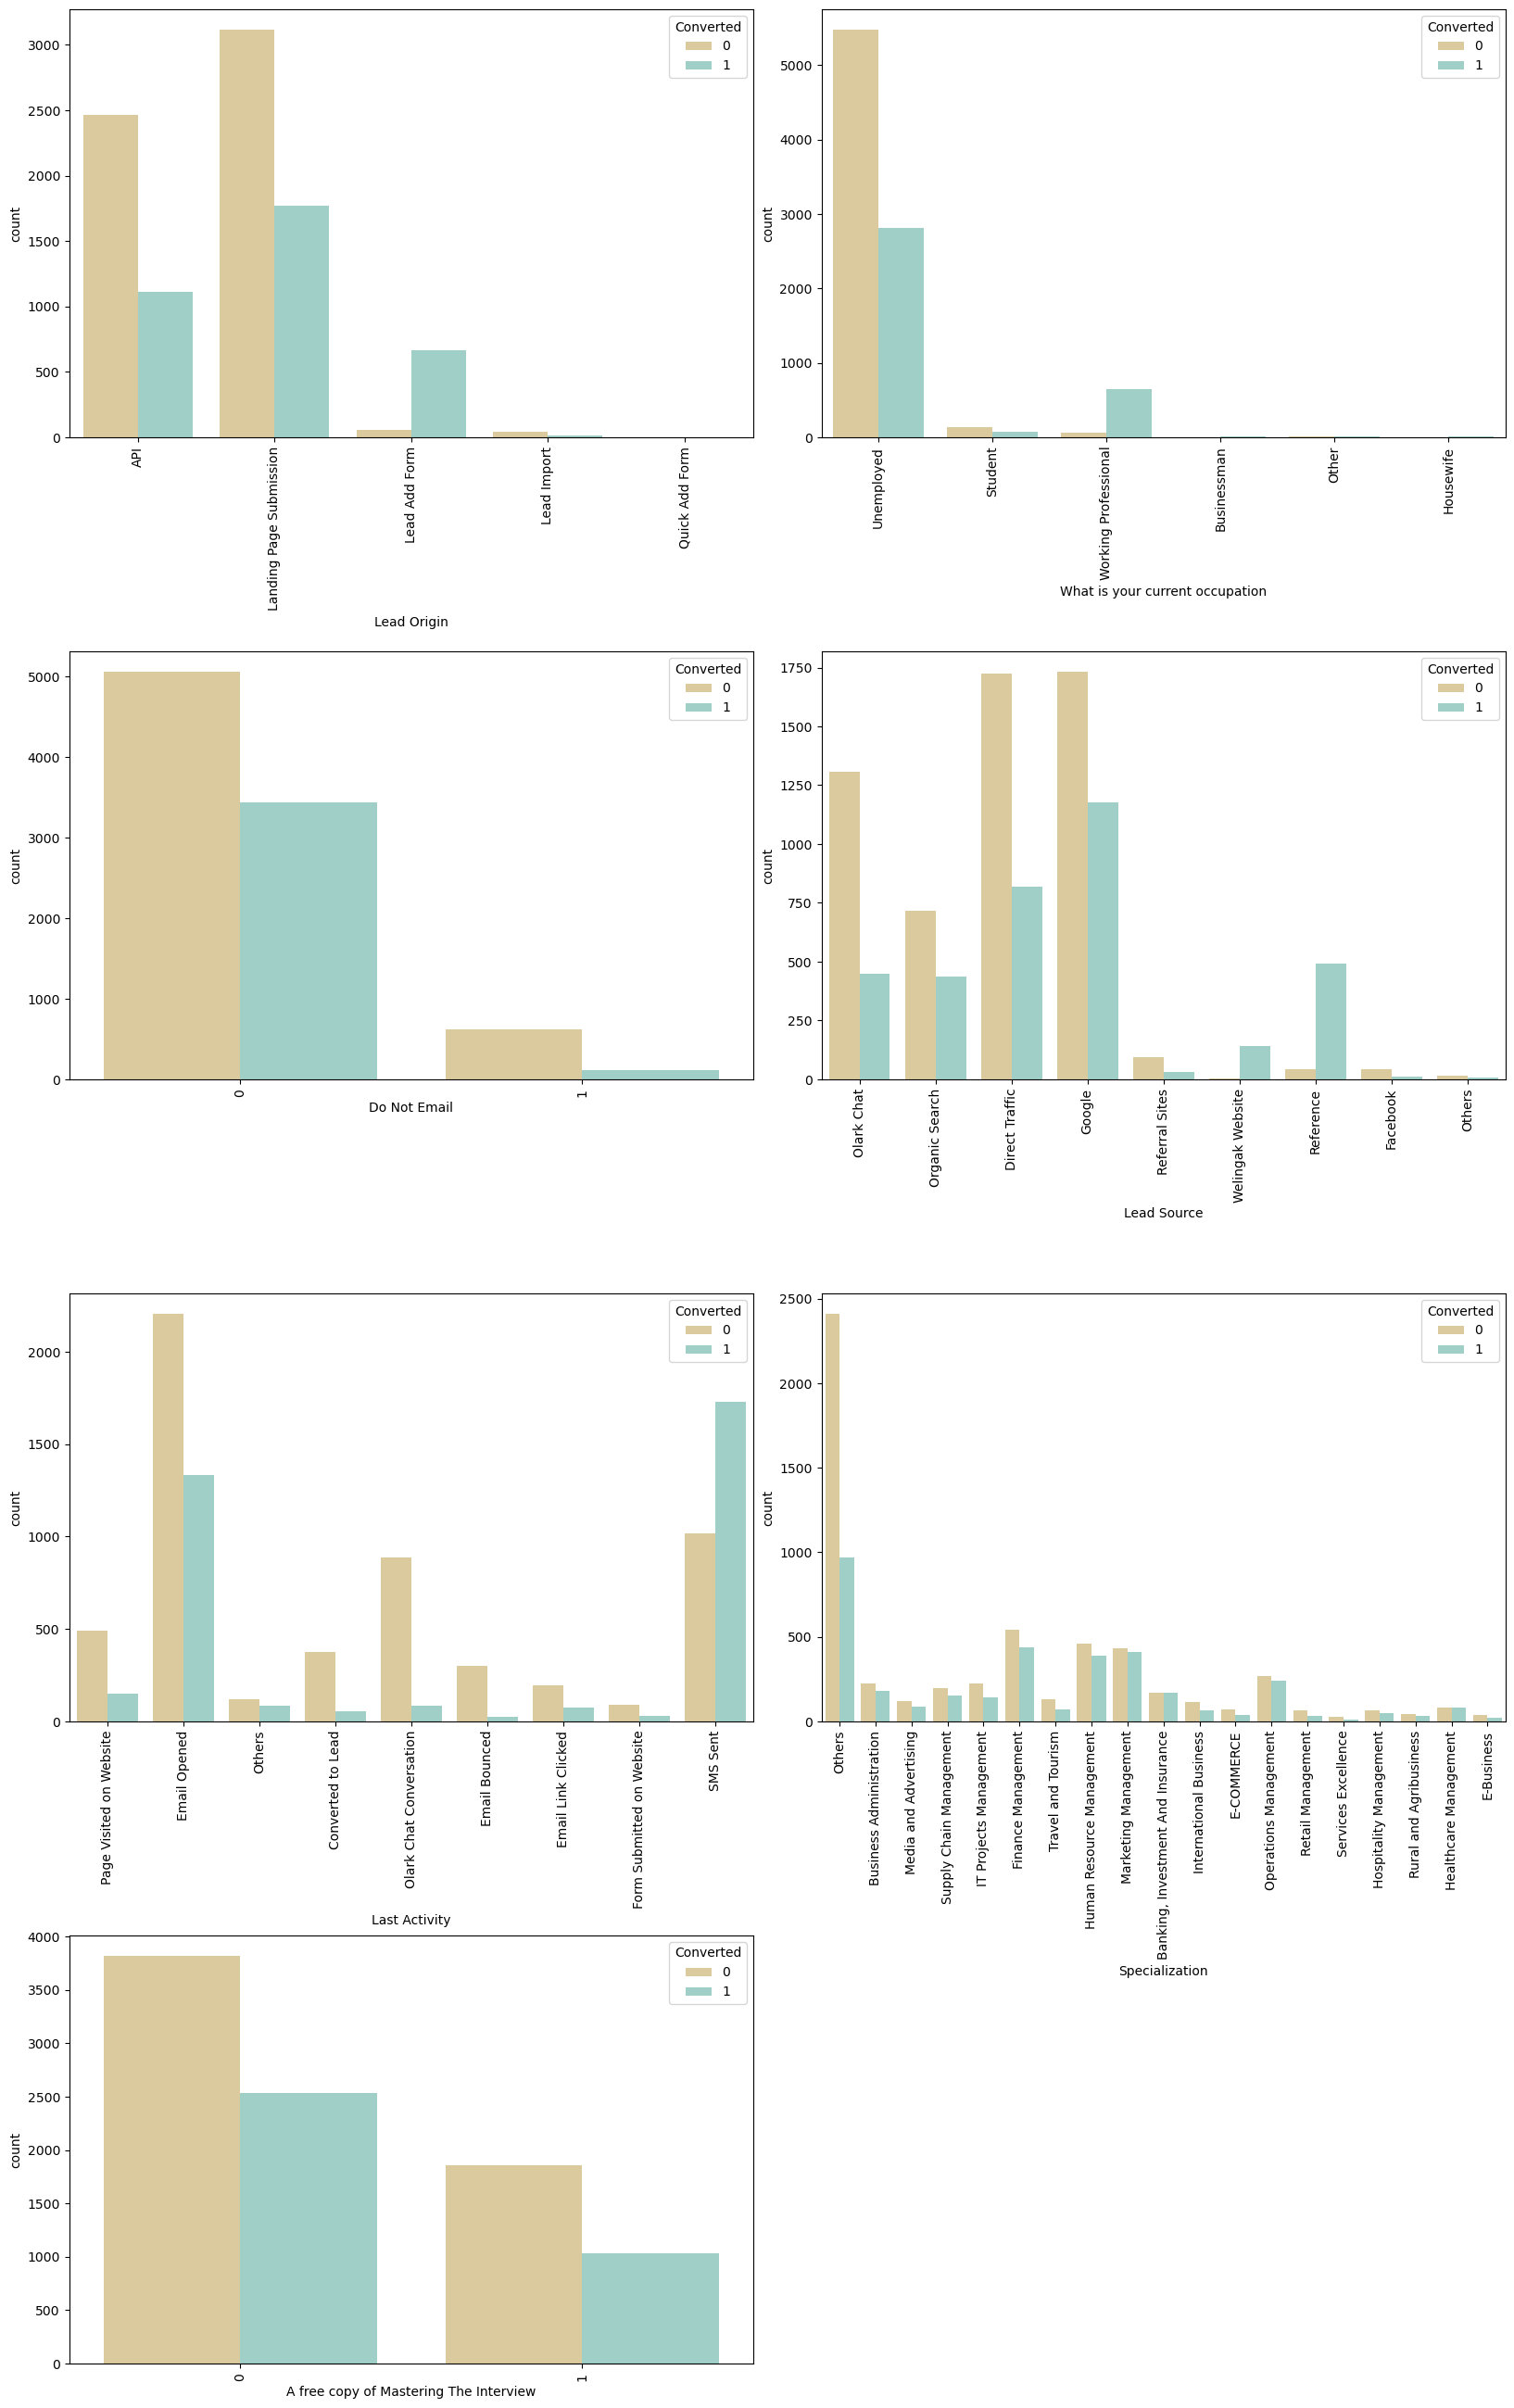

In [314]:
plt.figure(figsize=(20,60))

plt.subplot(7,2,1)
plt.subplots_adjust(wspace=0.1,hspace=0.5)
plt.xticks(rotation=90)
sns.countplot(data=data,x='Lead Origin',hue='Converted',palette='BrBG')

plt.subplot(7,2,2)
plt.xticks(rotation=90)
sns.countplot(data=data,x='What is your current occupation',hue='Converted',palette='BrBG')

plt.subplot(7,2,3)
plt.xticks(rotation=90)
sns.countplot(data=data,x='Do Not Email',hue='Converted',palette='BrBG')

plt.subplot(7,2,4)
plt.xticks(rotation=90)
sns.countplot(data=data,x='Lead Source',hue='Converted',palette='BrBG')

plt.subplot(7,2,5)
plt.xticks(rotation=90)
sns.countplot(data=data,x='Last Activity',hue='Converted',palette='BrBG')

plt.subplot(7,2,6)
plt.xticks(rotation=90)
sns.countplot(data=data,x='Specialization',hue='Converted',palette='BrBG')

plt.subplot(7,2,7)
plt.xticks(rotation=90)
sns.countplot(data=data,x='A free copy of Mastering The Interview',hue='Converted',palette='BrBG')


#### Bivariate Analysis for Numerical Variables

In [315]:
num_col =['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

<Figure size 1600x400 with 0 Axes>

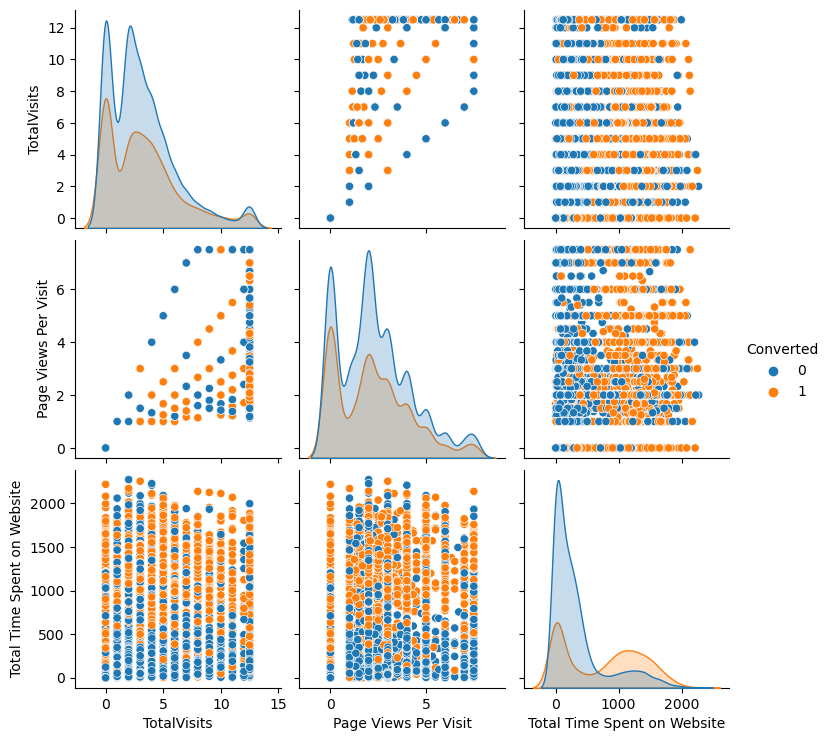

In [316]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=data,vars=num_col,hue="Converted")                                  
plt.show()

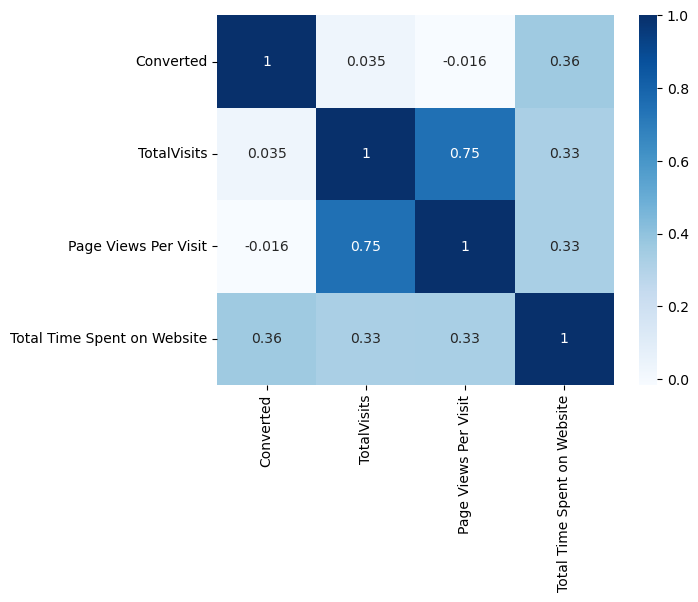

In [317]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
sns.heatmap(data=data[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

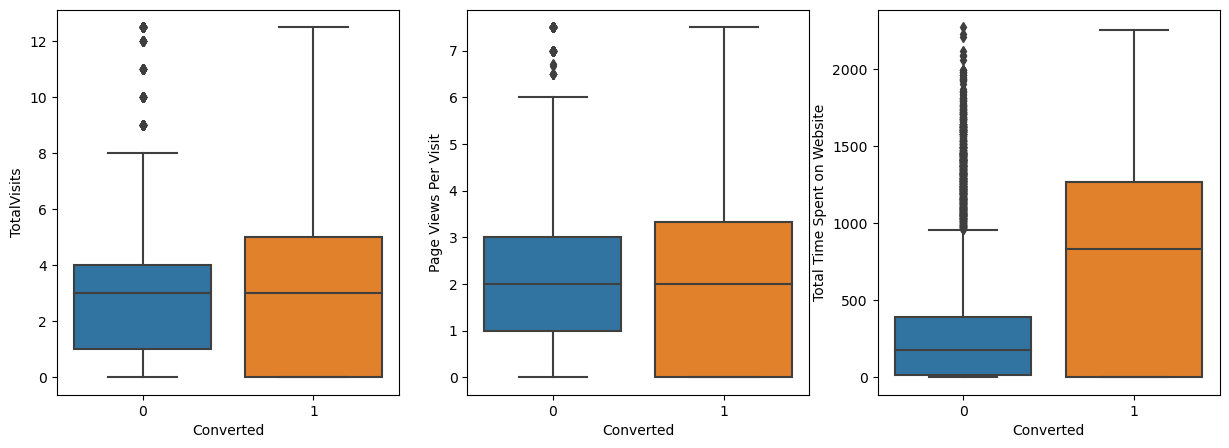

In [318]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)
plt.show()

Leads who spends more time on Website are successfully converted than those who spends less

## Data Preparation

#### Dummy Variables

In [319]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [320]:
data.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)
data.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [321]:
dummy = pd.get_dummies(data[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

data = pd.concat([data, dummy], axis=1)

In [322]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


We have created dummy variables for below column so dropping it.

In [323]:
data.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1,inplace=True)

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

## Test-Train Split

In [325]:
X = data.drop('Converted', axis=1)
y = data["Converted"]

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [327]:
X_train.shape

(6468, 48)

In [328]:
X_test.shape

(2772, 48)

In [329]:
y_train.shape

(6468,)

In [330]:
y_test.shape

(2772,)

## Feature Scaling

In [331]:
scaler = StandardScaler()

num_col=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [332]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [333]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
LCR = (sum(data['Converted'])/len(data['Converted'].index))*100
LCR

38.53896103896104

We have 38.5% Conversion Rate

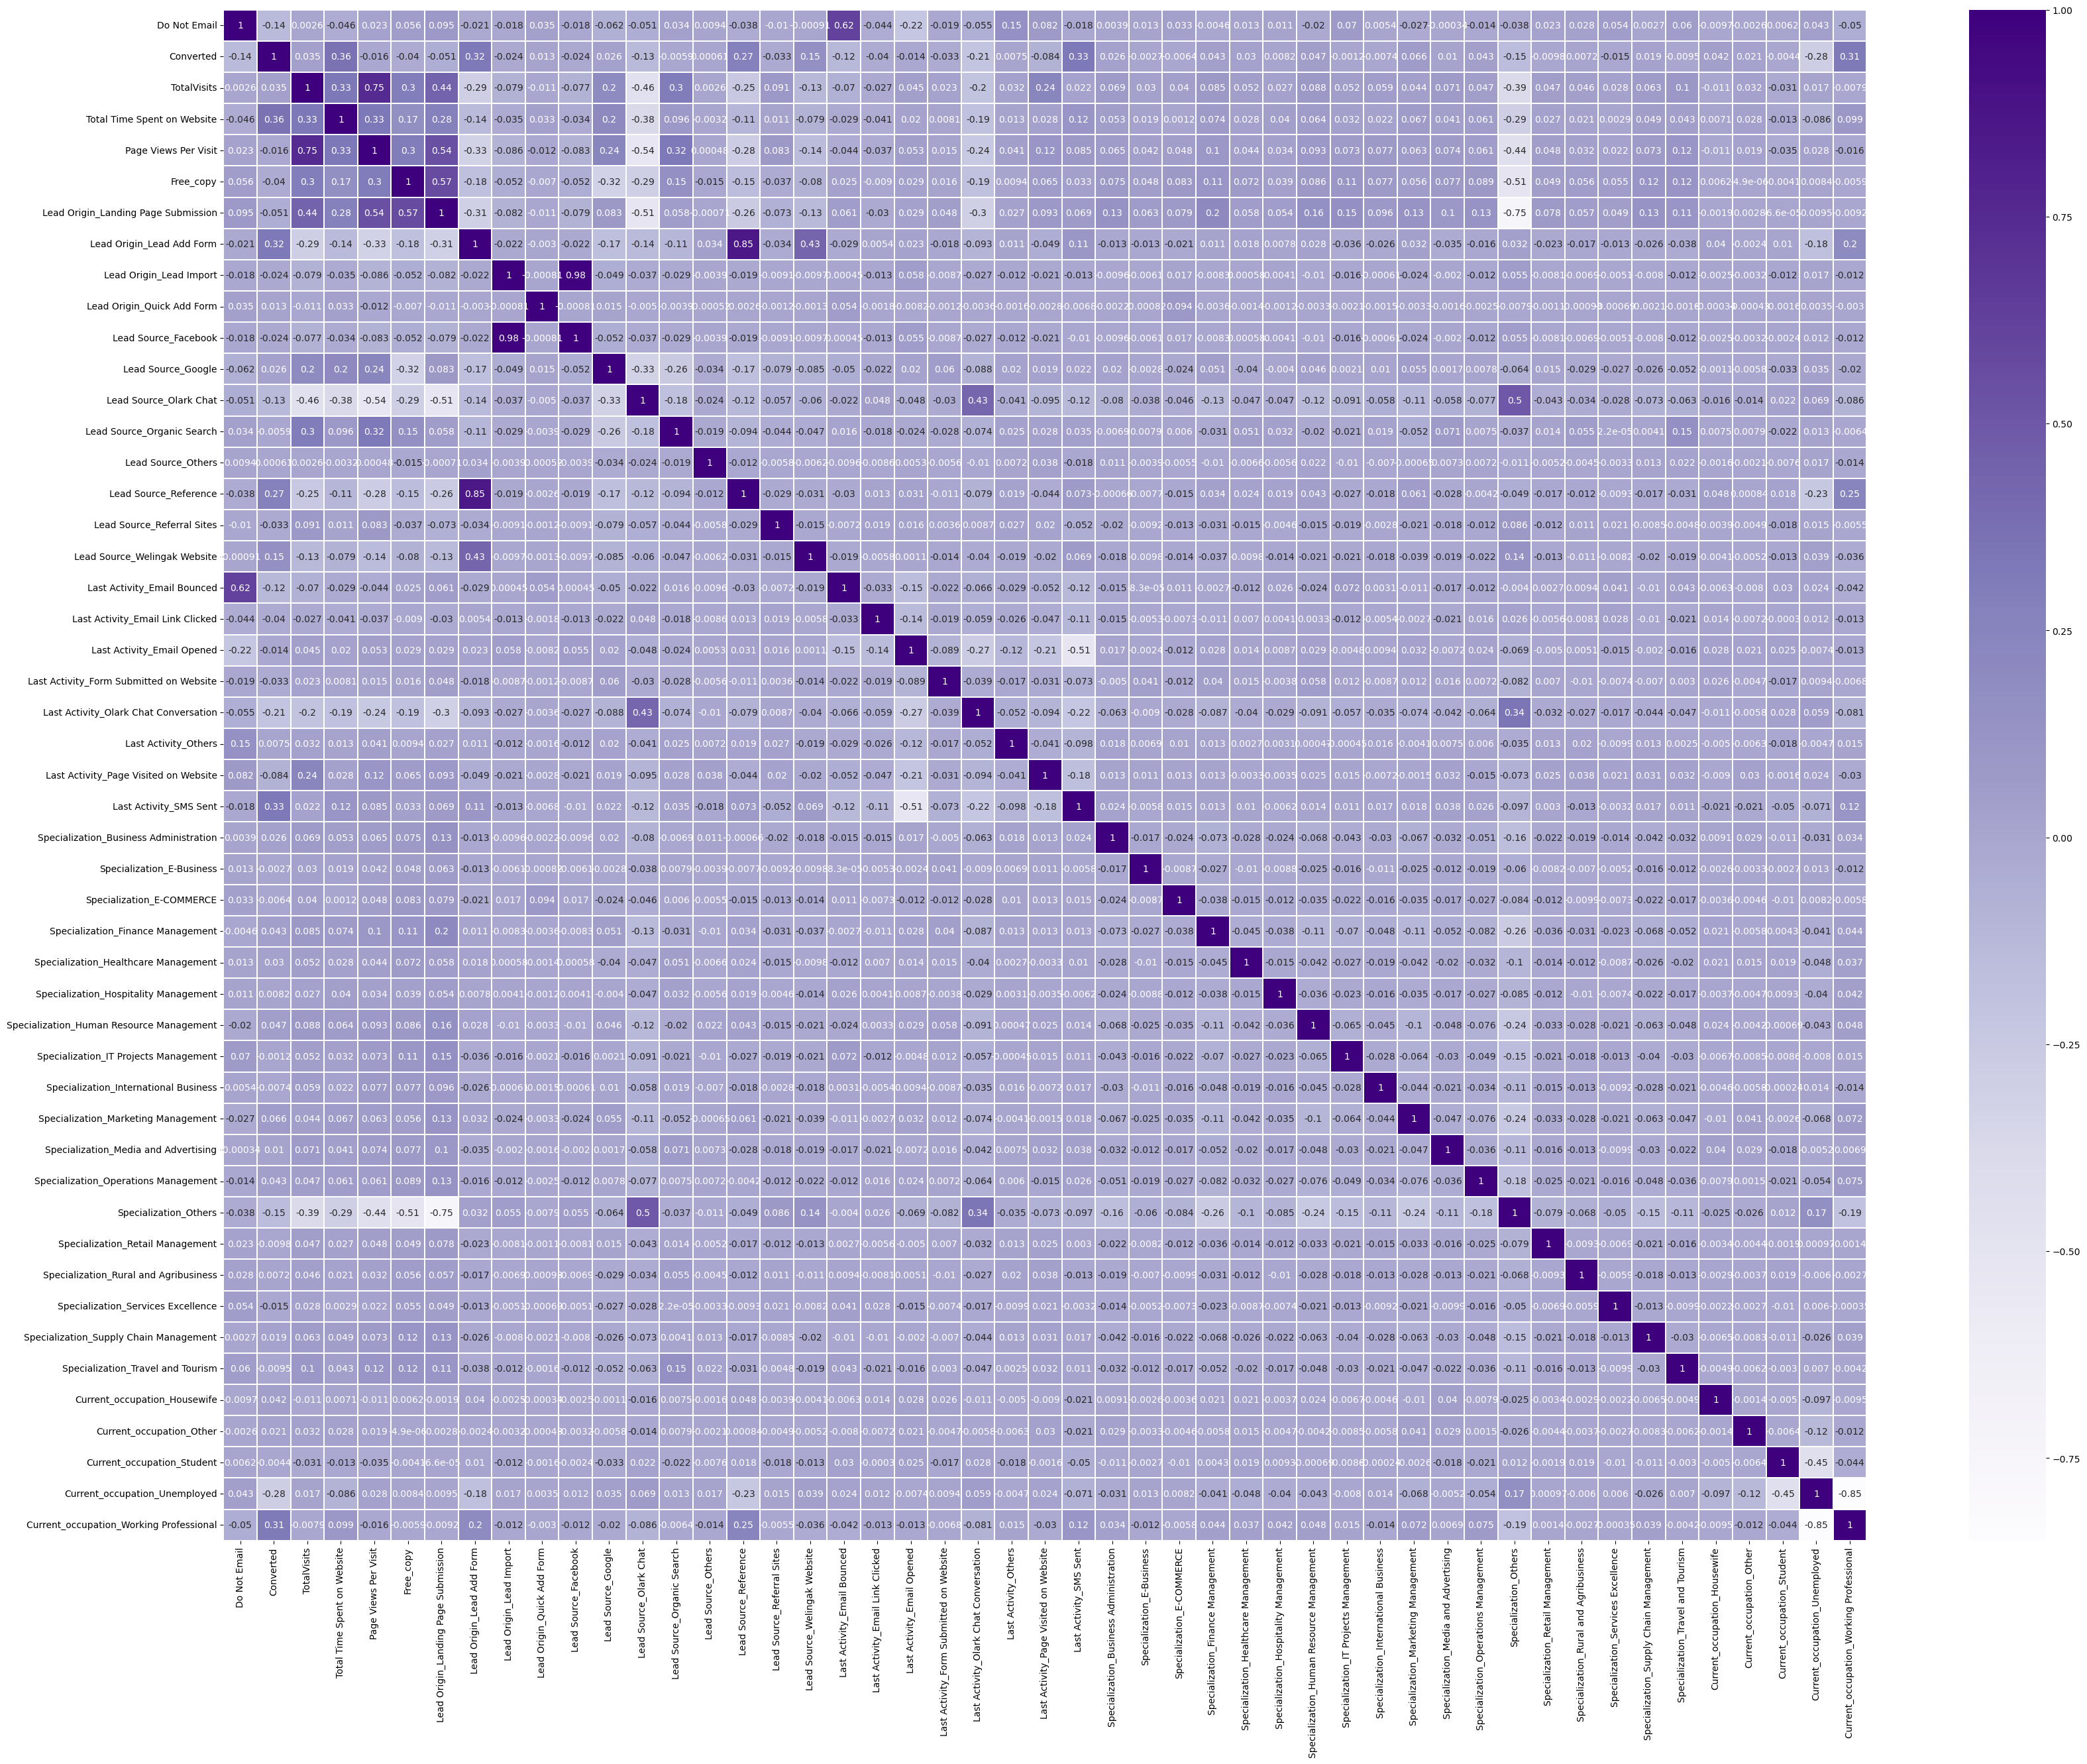

In [334]:
plt.figure(figsize = (40,30))        
sns.heatmap(data.corr(),linewidths=0.01,cmap="Purples",annot=True)
plt.show()

In [335]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

The above 2 columns are very high coorelated so dropping it

## Model Building

### Feature Selection Using RFE

In [336]:
reg = LogisticRegression()
rfe = RFE(reg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

Check the top 15 features chosen by RFE

In [338]:
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,Current_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


columns which are selected by RFE

In [346]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

columns which are not selected by RFE

In [347]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

UDF for calculating VIFs for variables

In [341]:
def check_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [348]:
rfe_col=X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_col]
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()  
logm.params
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Mon, 27 May 2024   Deviance:                       5465.5
Time:                        01:11:35   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Dropping "Current_occupation_Housewife" column due to high p-value of 0.999

In [350]:
rfe_col=rfe_col.drop("Current_occupation_Housewife")

### Model 2

In [351]:
X_train_rfe = X_train[rfe_col]
X_train_sm1 = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  
logm1.params
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Mon, 27 May 2024   Deviance:                       5480.7
Time:                        01:13:25   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Dropping "Lead Source_Facebook" column due to high p-value of 0.187,

In [ ]:
rfe_col=rfe_col.drop("Lead Source_Facebook")

### Model 3

In [353]:
X_train_rfe = X_train[rfe_col]
X_train_sm2 = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  
logm2.params
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Mon, 27 May 2024   Deviance:                       5482.6
Time:                        01:14:54   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Dropping "Lead Source_Others" column due to high p-value of 0.055

In [354]:
rfe_col=rfe_col.drop("Lead Source_Others")

### Model 4

In [355]:
X_train_rfe = X_train[rfe_col]
X_train_sm3 = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  
logm3.params
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Mon, 27 May 2024   Deviance:                       5486.1
Time:                        01:16:15   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Model 4 is stable and has significant p-values within the threshold, so we will use it for further analysis.

In [356]:
check_vif(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


## Model Evaluation

Getting the predicted values on the train set

In [358]:
y_train_pred = logm3.predict(X_train_sm3)           
y_train_pred[:15]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
1032    0.815310
6542    0.298849
4317    0.116703
6472    0.416410
712     0.053843
dtype: float64

In [359]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073,
       0.81530964, 0.29884874, 0.11670257, 0.4164101 , 0.05384323])

In [360]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


In [361]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# checking top 5
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### Confusion Matrix

In [362]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


### Accuracy

In [363]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


#### Sensitivity and Specificity

In [364]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [365]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.656934306569343


In [366]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.896551724137931


In [367]:
print(FP/ float(TN+FP))

0.10344827586206896


In [368]:
print (TP / float(TP+FP))

0.7964601769911505


In [369]:
print (TN / float(TN+ FN))

0.8092016238159675


### Plotting the ROC Curve

In [370]:
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [373]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"], drop_intermediate = False )

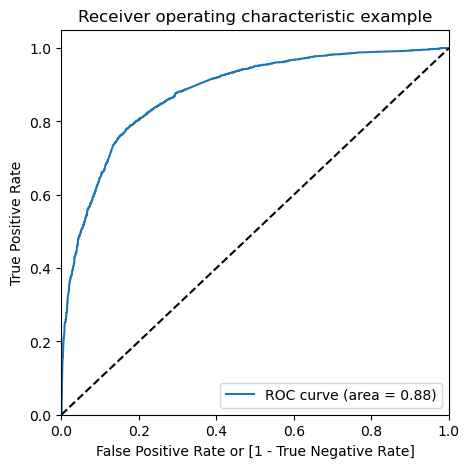

In [375]:
roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"])

ROC curve is 0.88 out of 1 which indicates a good predictive model

#### Finding Optimal Cutoff Point/ Probability

In [377]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [378]:
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

numb = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numb:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


line graph showing accuracy,sensitivity and specificity for various probabilities.

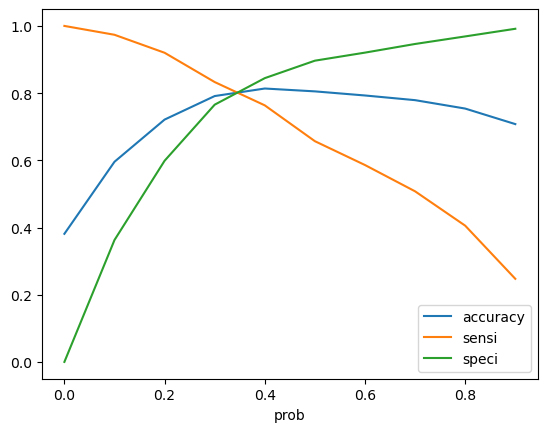

In [379]:
cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [380]:
y_train_pred_final['final_pred'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


#### Calculating all metrics using confusion matrix for train

In [381]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_pred"]))

0.8045763760049475


#### UDF for all Logistic Regression Metrics

In [382]:
def logreg_all(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

Confusion metrics for 'y_train_pred_final'

In [384]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_pred'])
print(confusion_matrix)

[[3230  772]
 [ 492 1974]]


In [385]:
logreg_all(confusion_matrix)

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


#### Precision and recall 

Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [387]:
y_train_pred_final['Converted'], y_train_pred_final['final_pred']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

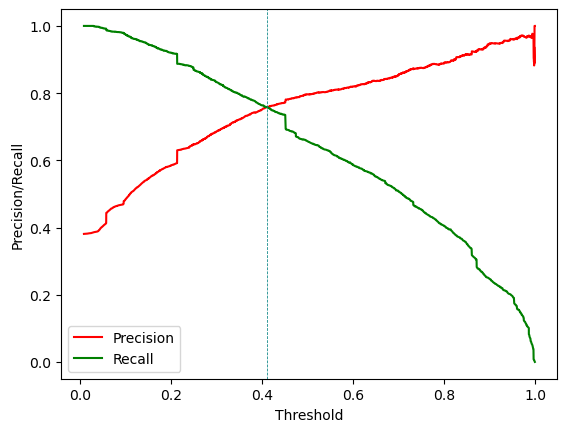

In [388]:
plt.plot(thresholds, p[:-1], "r-", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

The intersection of the curve represents the threshold value at which the model achieves a balance of precision and recall. 

In [389]:
y_train_prec_rec = y_train_pred_final.copy()

In [390]:
y_train_prec_rec['precision_recall_prediction'] = y_train_prec_rec['Converted_prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_prec_rec.head()

,Converted,Converted_prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.474082,1871,1,1
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,1
4,0,0.212973,3934,0,0


Confusion metrics for 'y_train_precision_recall' 

In [394]:
confusion_matrix2 = metrics.confusion_matrix(y_train_prec_rec['Converted'], y_train_prec_rec['precision_recall_prediction'])
print(confusion_matrix2)

[[3406  596]
 [ 596 1870]]


In [395]:
logreg_all(confusion_matrix2)

True Negative                    :  3406
True Positive                    :  1870
False Negative                   :  596
False Positve                    :  596
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7583
Model Specificity                :  0.8511
Model Precision                  :  0.7583
Model Recall                     :  0.7583
Model True Positive Rate (TPR)   :  0.7583
Model False Positive Rate (FPR)  :  0.1489


Train Data Set:<br>
    
Accuracy: 80.46% <br>
Sensitivity: 80.05% <br>
Specificity: 80.71%

In [430]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.474082,1871,1,47
1,0,0.073252,6795,0,7
2,0,0.249087,3516,0,25
3,0,0.768973,8105,1,77
4,0,0.212973,3934,0,21


## Making Predictions on test set

In [396]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [397]:
num_colu=X_test.select_dtypes(include=['int64','float64']).columns

X_test[num_colu] = scaler.transform(X_test[num_colu])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


### Prediction on Test Dataset using final model

In [398]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

Making prediction using final model

In [399]:
y_test_pred = logm3.predict(X_test_sm)

In [400]:
y_test_pred[:15]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
2558    0.296737
8973    0.114542
2935    0.712417
2907    0.876253
957     0.226391
dtype: float64

In [401]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [402]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


Putting Prospect ID to index

In [423]:
y_test_df['Prospect ID'] = y_test_df.index

In [424]:
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [425]:
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,0,0.697934
1,1,1,0.860665
2,1,2,0.889241
3,0,3,0.057065
4,1,4,0.871510


In [426]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_prob'})

In [427]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,0,0.697934
1,1,1,0.860665
2,1,2,0.889241
3,0,3,0.057065
4,1,4,0.871510


In [433]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

In [434]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,0,1,0.697934
1,1,1,0.860665
2,2,1,0.889241
3,3,0,0.057065
4,4,1,0.871510


In [435]:
y_pred_final['final_pred'] = y_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_pred
0,0,1,0.697934,1
1,1,1,0.860665,1
2,2,1,0.889241,1
3,3,0,0.057065,0
4,4,1,0.871510,1


#### ROC curve for Test Set

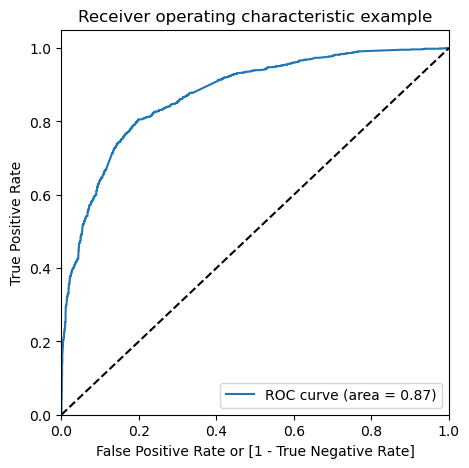

In [436]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_prob"], drop_intermediate = False )

roc_curve(y_pred_final["Converted"], y_pred_final["Converted_prob"])

Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

In [437]:
confusion_matrix3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_pred'])


In [438]:
logreg_all(confusion_matrix3)

True Negative                    :  1353
True Positive                    :  874
False Negative                   :  221
False Positve                    :  324
Model Accuracy                   :  0.8034
Model Sensitivity                :  0.7982
Model Specificity                :  0.8068
Model Precision                  :  0.7295
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1932


For Test set <br>
Accuracy : 80.34% <br>
Sensitivity : 79.82% ≈ 80% <br>
Specificity : 80.68% 

In [439]:
param=logm3.params.sort_values(ascending=False)
param

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
Current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

In [440]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_pred,Lead_Score
0,0,1,0.697934,1,70
1,1,1,0.860665,1,86
2,2,1,0.889241,1,89
3,3,0,0.057065,0,6
4,4,1,0.871510,1,87


*The customers with a higher lead score have a higher conversion chance <br>
The customers with a lower lead score have a lower conversion chance.<br>*

#### CONCLUSION

*1. The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.<br>*
*2. The final Logistic Regression Model has 12 features.<br>*
*3. Features used in final model are ['Lead Source_Welingak Website','Lead Source_Reference,'Current_occupation_Working Professional','Last Activity_SMS Sent','Last Activity_Others','Total Time Spent on Website','Last Activity_Email Opened',
'Lead Source_Olark Chat','Last Activity_Olark Chat Conversation','Specialization_Hospitality Management','Specialization_Others','Lead Origin_Landing Page Submission']*

*Top 3 features that positively contributing:<br>*

*Lead Source_Welingak Website<br>*

*Lead Source_Reference<br>*

*Current_occupation_Working Professional*

#### RECOMMENDATIONS

*To increase our Lead Conversion Rates:<br>*
1. Focus on working professionals.<br>
2. More spend can be done on Welingak Website in terms of advertising.<br>
3. Create tactics for generating high-quality leads from top-performing lead sources.<br>